<a href="https://colab.research.google.com/github/samsomsabu/machine_learning/blob/main/2348549LAB_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df = pd.read_csv('/content/Churn_Modelling - Churn_Modelling.csv')


In [5]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [6]:
df.shape

(10000, 14)

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
#Data Cleaning and we drop the columns with duplicate
df = df.drop_duplicates()
df = df.dropna()
df = df.drop (['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [10]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [11]:
df.dtypes.to_frame('Data Type')

Data Type
CreditScore         int64
Geography          object
Gender             object
Age                 int64
Tenure              int64
Balance           float64
NumOfProducts       int64
HasCrCard           int64
IsActiveMember      int64
EstimatedSalary   float64
Exited              int64

In [12]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])

Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

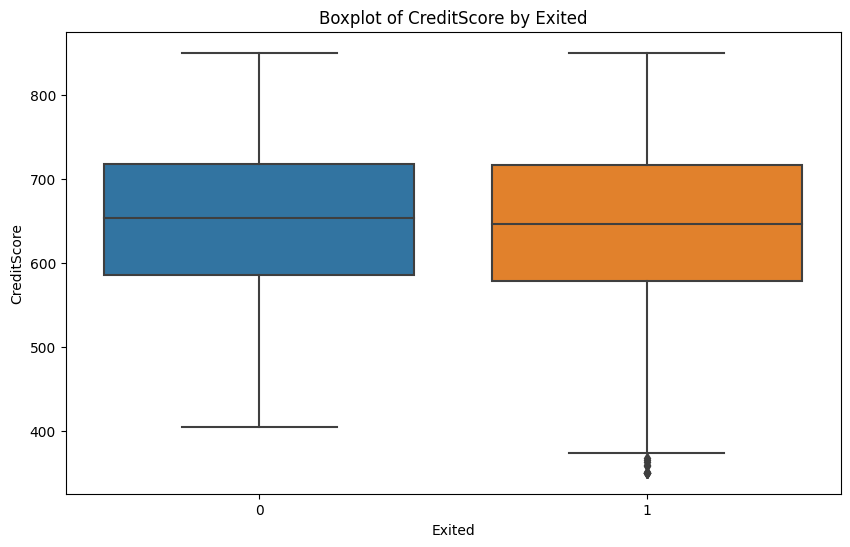

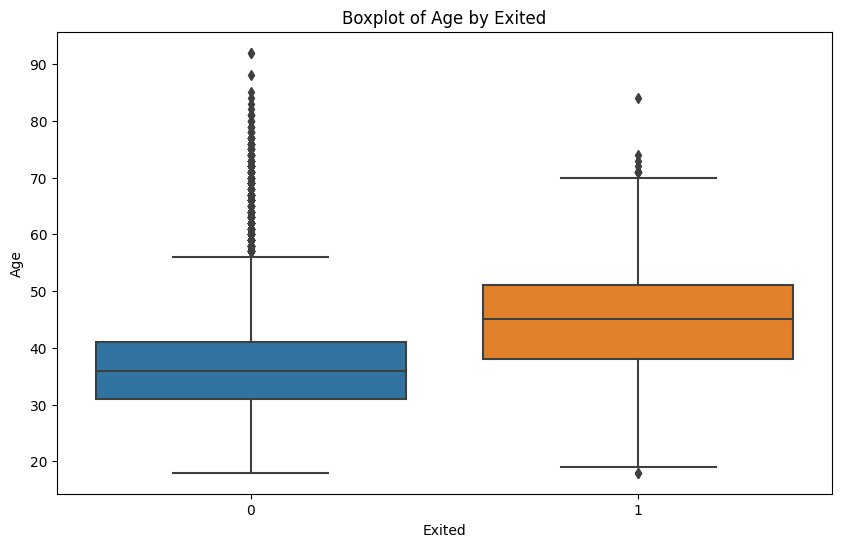

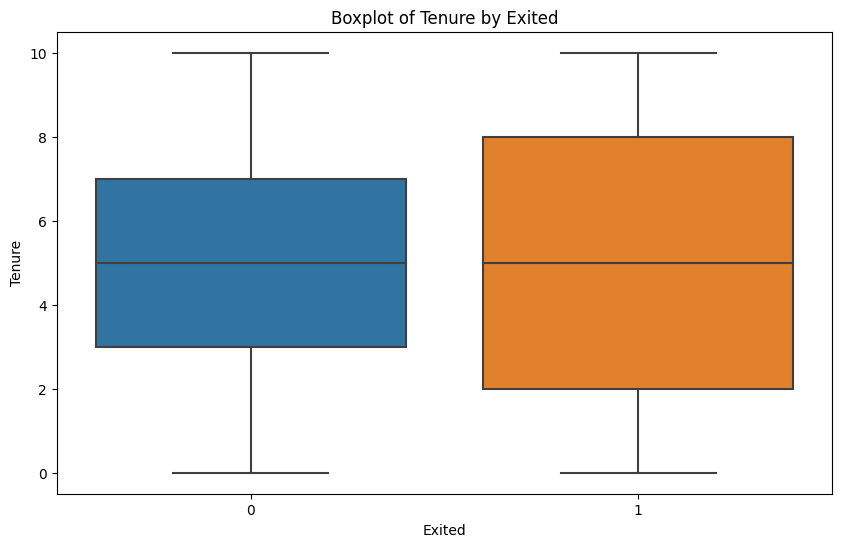

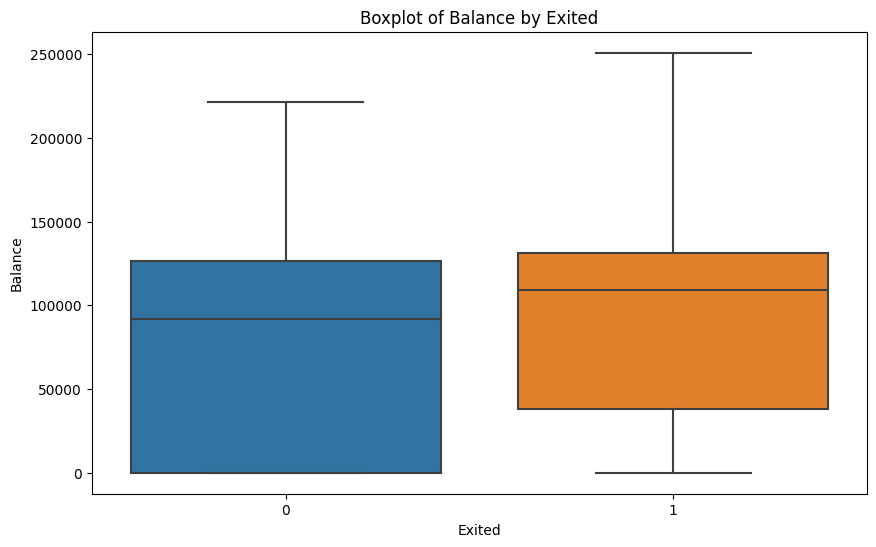

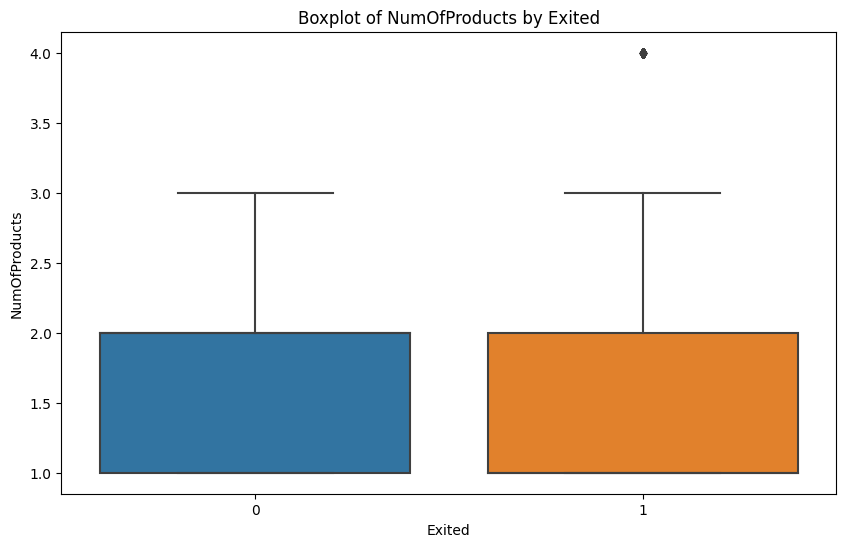

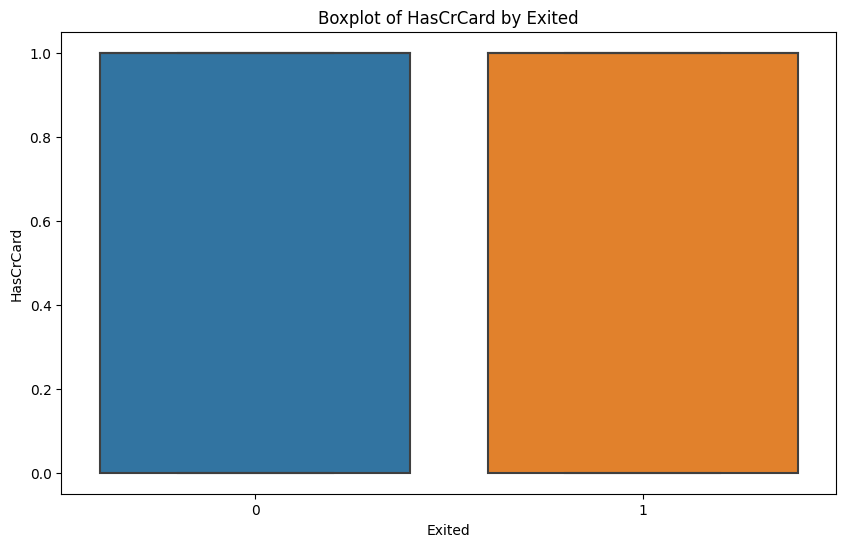

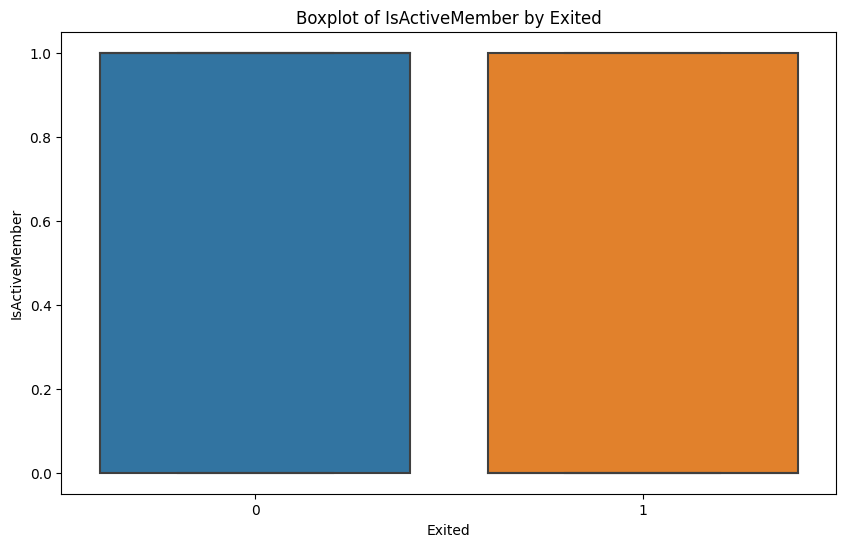

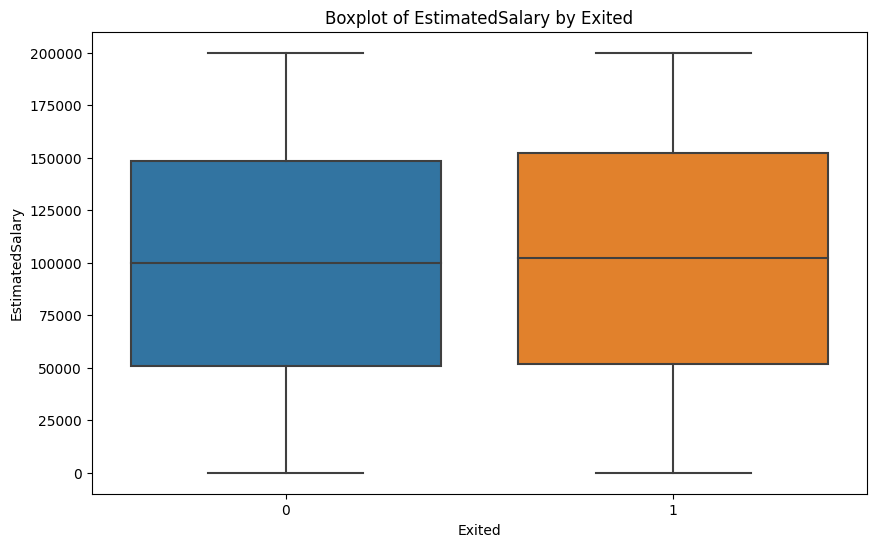

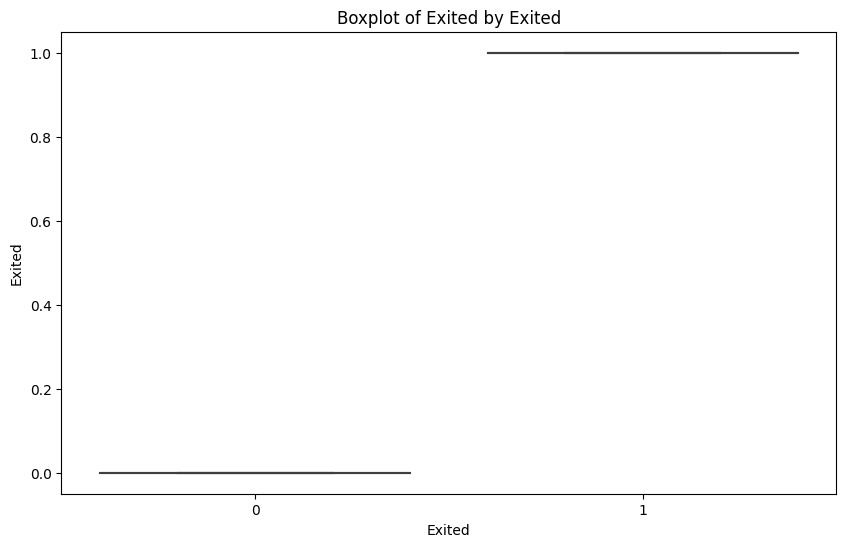

In [14]:
#Detecting and Handling the outliers
num_features = df.select_dtypes(include=[np.number]).columns
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Exited')
    plt.show()

Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no = df[~((df[num_features] < lower_bound) | (df[num_features] > upper_bound)).any(axis=1)]

In [15]:
#To check wether a customer has zero balance.
df['Balance_binary'] = df['Balance'].where(df['Balance'] == 0, 1)
df['Balance_binary'].value_counts()

# To check the effect on churningc
#customers with no balance is less likley to churn


1.0    6383
0.0    3617
Name: Balance_binary, dtype: int64

In [16]:
df[['Balance_binary','Exited']].groupby('Balance_binary').mean()

Exited
Balance_binary          
0.0             0.138236
1.0             0.240796

<ipython-input-17-bf65051b119c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_no.corr(), annot=True, cmap='coolwarm')


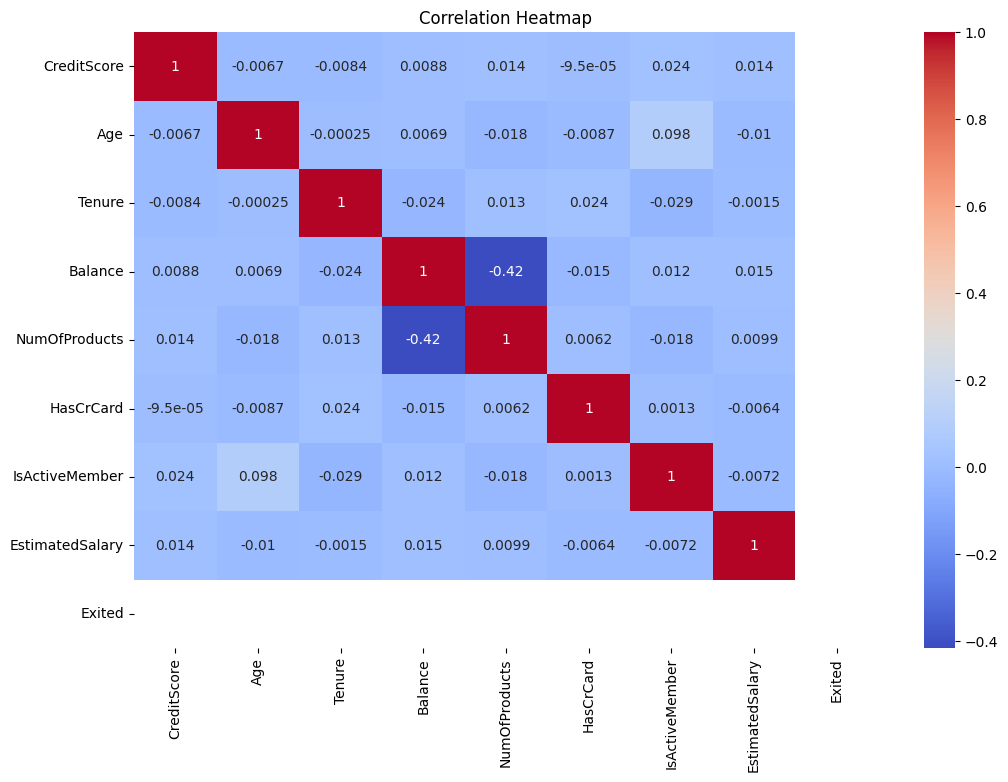

In [17]:
#Exploratory Data Analysis
#No we need to check the covariance to check the simalirity between the variables. It returns a matrix which can be used for plotting
plt.figure(figsize=(12, 8))
sns.heatmap(df_no.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
#avg age is higher for those who churned
df[['Exited','Age']].groupby('Exited').mean()

Age
Exited           
0       37.408389
1       44.837997

<Axes: title={'center': 'Boxplot of the Age Column'}, ylabel='Age'>

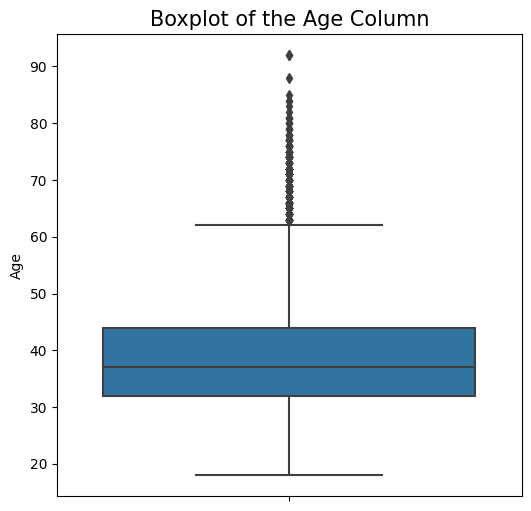

In [19]:
#outliers are present for the higher age catogery
plt.figure(figsize=(6,6))
plt.title("Boxplot of the Age Column", fontsize=15)
sns.boxplot(y=df['Age'])

In [20]:
#We can check that outlier with the mean and median
print(df['Age'].mean())
print(df['Age'].median())

38.9218
37.0


In [21]:
#Min Max normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_no[num_features])

In [22]:
#PCA
pcanalysis = PCA(n_components=0.95)
pca_data = pcanalysis.fit_transform(normalized_data)

In [23]:
#Feature Selection
X = pca_data
y = df_no['Exited']

selector = SelectKBest(score_func=f_classif, k=8)
selected_features = selector.fit_transform(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

# Fit RandomForestClassifier to training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


In [24]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1536

    accuracy                           1.00      1536
   macro avg       1.00      1.00      1.00      1536
weighted avg       1.00      1.00      1.00      1536



<Axes: xlabel='IsActiveMember', ylabel='count'>

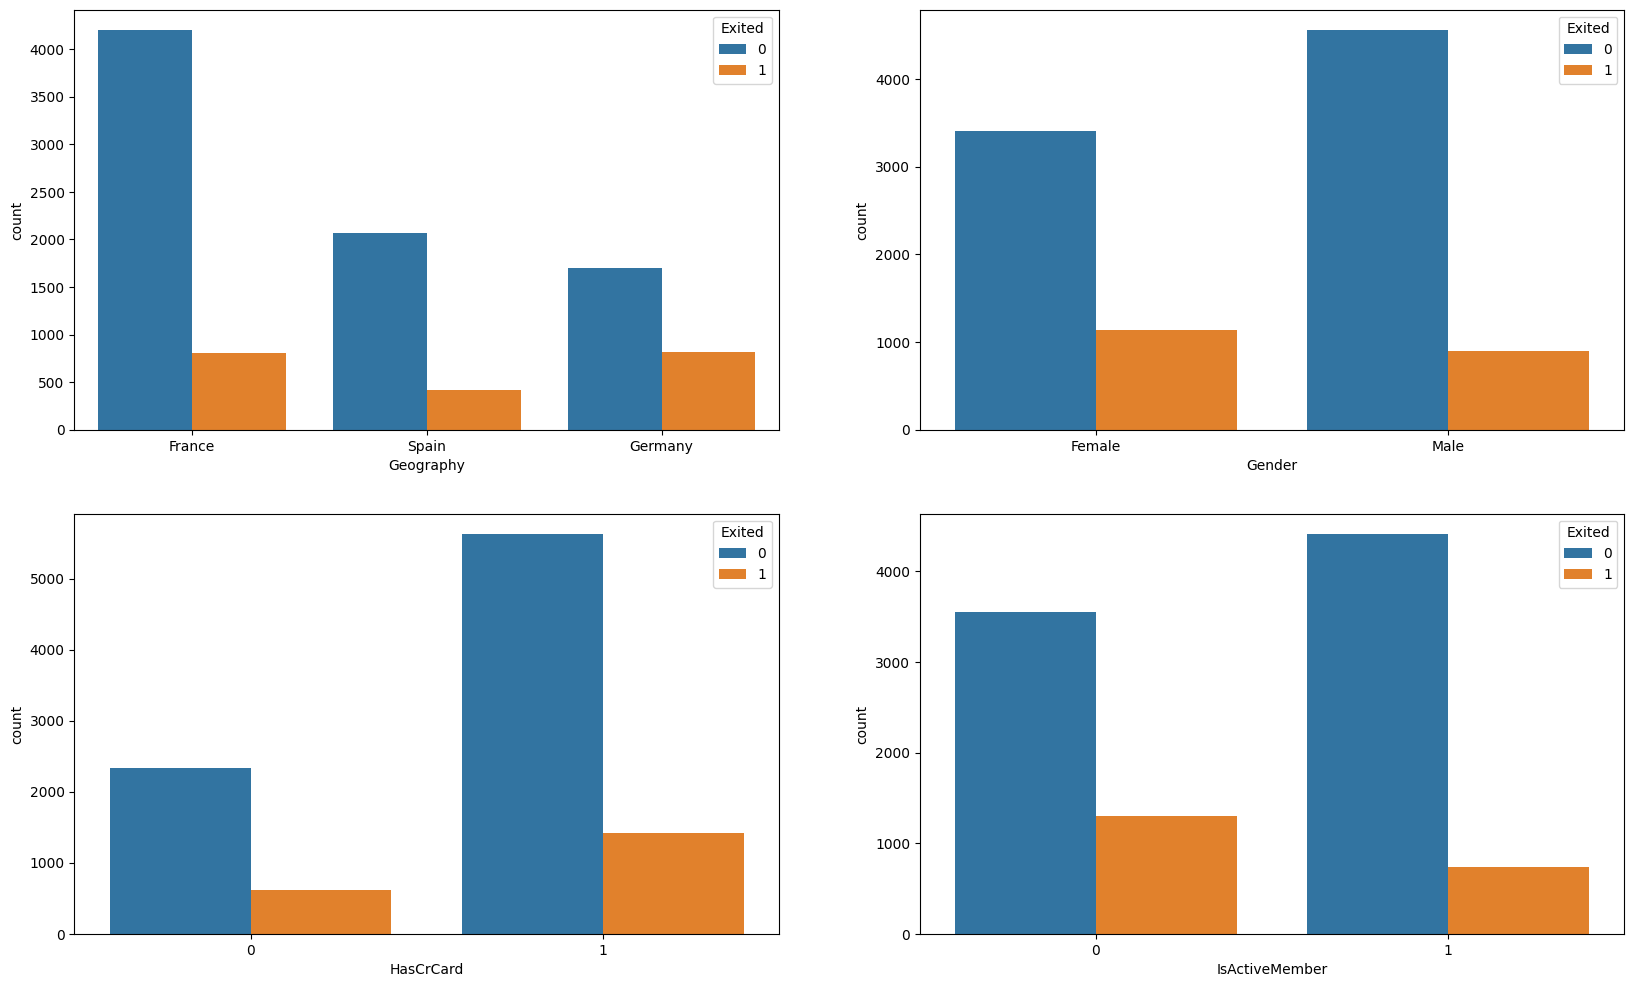

In [25]:
fig, axarr = plt.subplots(2,2, figsize=(20,12))
sns.countplot(x='Geography', hue ='Exited', data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue ='Exited', data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue ='Exited', data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue ='Exited', data = df, ax=axarr[1][1])